In [12]:
# Gerekli olan kütüpanelerin import edilmesi.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [13]:
# Veri setinin okunmasını sağlıyorum.
df = pd.read_csv(r"C:\Users\realb\Desktop\ML_dersler\ML_301\Random Forests Model\Hitters.csv")

# Veri setinin içinden eksik gözlemleri çıkarmak gerekiyor bu işlemi yapıyorum.
df = df.dropna()

# Şimdi ise dummies ile kukla veri işlemi yapıyorum. One end coding yöntemi ile bu işlemi yapıyorum.
dms = pd.get_dummies(df[['League', 'Division','NewLeague']])

# Bağımlı değişkenimi "y" atıyorum.
y = df["Salary"]

# Veri setimiz içindeki bağımlı değişkeni ve katogorik değişkenlerin götürülmesi işlemini yapıyorum.
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Sonuçunda yukardaki değerlerin dummi versyonlarını ve bağımsız değişkenlerimi bir arada tutma işlemini yapıyorum.
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

# Şimdi ise veri setimizde train ve test ayrımı yapmak için bu ayrımı yapma işlemini yapıyorum.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
# Model kurulumunun yapılmasını sağlamak istiyorum ve buna yönelik model kurulumunu yapıyorum.
# Birden fazla ağaç kurulumu ve bunların sonuçlarını gözlemlemek amacıyla farklı bir şekilde çalışma yapmayı hedefliyorum.
rf_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)

In [15]:
rf_model

RandomForestRegressor(random_state=42)

In [16]:
# Modele tahmin yaptırıyorum.
y_pred = rf_model.predict(X_test)

In [17]:
# Modelin hata kareler ortalamasını hesaplanmasını yapıyorum.
np.sqrt(mean_squared_error(y_test, y_pred))

344.8191624908484

Model tunned

In [ ]:
# Bu modelde birçok ayarlanacak hiperparemetre değerleri bulunmaktadır. 
# Ama bunlarda en çok kullanılan iki paremetre değeri ise fit edilecek ağaç sayısıdır "n_estimators" dur.
# Bir önemli hiper paremetre değeri ise şudur bölünme işlemlerinde göz önünde bulunduralacak değşken sayısıdır.
# Üçüncü olanı soracak olursanız min_saples_split ve min_saples_leaf olacaktır.

In [24]:
# Şimdi bu paremetreleri bir grid'e dönüştürüp onların bakalım sonuçlarına.
rf_params = {"max_depth": range(1,5,10),   # Birinci paremetremiz maksimum derinlik olarak belirledik.
            "max_features":   [1,5,10],  # Bu değer ise bölünmelerde göz önünde bulundurulması gereken değişken sayısı olarak tanımlayabiliriz.
            "n_estimators": [200, 500, 1000, 2000], # Bu değer ise fit edilecek ağaç sayısını temsil etmektedir.
            "min_samples_split": [2,10,80,100] 
            }

In [26]:
# Şimdi yukarda tanımlı olan paremetreler üzerinden model kurulumu yapılma işlemi yapılmaktadır.
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


In [27]:
# Şimdi yukardaki kurulan modelin önereceği en iyi paremetrelere bakalım.
rf_cv_model.best_params_

{'max_depth': 7,
 'max_features': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

Final model kurulumu

In [29]:
# Gelen en iyi paremetre değerlerini kullanarak model kurulumu yapıyorum.
rf_model_1 = RandomForestRegressor(random_state=42, max_depth= 7, 
                                   max_features= 1, 
                                   min_samples_split= 2, 
                                   n_estimators= 200)
rf_tunned = rf_model_1.fit(X_train, y_train)

In [30]:
rf_tunned

RandomForestRegressor(max_depth=7, max_features=1, n_estimators=200,
                      random_state=42)

In [32]:
# Şimdi tahmin ve hata kareler ortalamasını inceliyorum.
y_pred = rf_tunned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

355.78208539457927

## Deşiken önem düzeyi

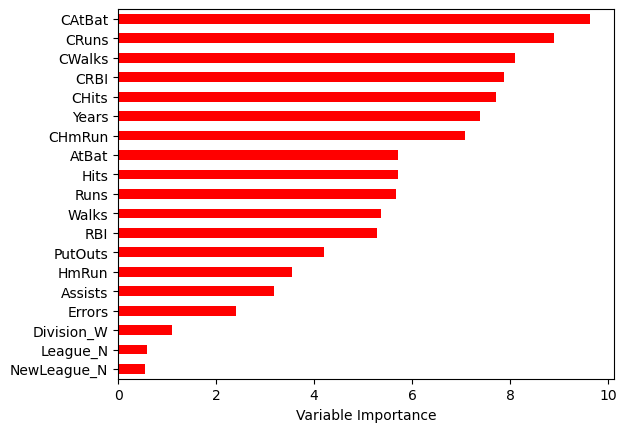

In [34]:
# Model kularırken kullanmamız gerek değişkenleri görmemizi veya odaklanmamızı sağlayan bir imkan vermektedir.

# Şimdi burda bir data frame oluşturacağız ve bu modelin tunned edilmiş olan modelin değerleri Feature importances ismi verilen nesnesinden gelen değerler olacak.,
# Değişken oönemlerinin skor değerleri gelmektedir.
# İsimlerinide başka bir sütüne alıyorum.
Importance = pd.DataFrame({'Importance': rf_tunned.feature_importances_*100},
                         index = X_train.columns)

# İmportance sütününa göre verileri sıralamak istiyorum, satır bazında olacak şekilde büyükten küçüğe doğru sıralamak istiyorum.
Importance.sort_values(by= 'Importance',
                       axis = 0,
                       ascending= True).plot(kind = 'barh',
                                            color = 'r')

plt.xlabel('Variable Importance')
plt.gca().legend_ = None


"""
Bu işlem sonucunda kullanmış olduğumuz değerlerin hangisisin daha önemli olduğunu bize görece sıralamış oldu.
BVu işelemi yapmaktaki amaçımız şu olmaktadır. 100 tane değişken var ve bunu herzaman kullanmak sitemeyeceğiz önemli olanlara bakıp devam edeçeğiz.
Bu şekilde bazen ise Hipre paremetre optimizisyonu yapabiliyoruz ama paremetre optimizasyonuda yapmalıyız.
"""